In [7]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

In [8]:
def Canny_detector(img, weak_th=None, strong_th=None):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1.4)

    # Compute gradients
    gx = cv2.Sobel(np.float32(img_blur), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img_blur), cv2.CV_64F, 0, 1, 3)

    # Convert Cartesian to polar coordinates
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    # Thresholding
    mag_max = np.max(mag)
    if not weak_th:
        weak_th = mag_max * 0.1
    if not strong_th:
        strong_th = mag_max * 0.5

    # Apply double thresholding
    strong_edges = (mag >= strong_th).astype(np.uint8) * 255
    weak_edges = ((mag >= weak_th) & (mag < strong_th)).astype(np.uint8) * 127

    # Combine weak and strong edges
    edges = cv2.add(strong_edges, weak_edges)
    return edges


In [ ]:
frame = cv2.imread('i1.jpg')

In [10]:
if frame is None:
    print("Error: Could not load image.")
else:
    # Apply Canny detector
    canny_img = Canny_detector(frame)

In [11]:
# Create an RGB image with white background
height, width = canny_img.shape
output_img = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background

# Overlay red edges on white background
output_img[canny_img > 0] = [255, 0, 0]  # Red color for edges


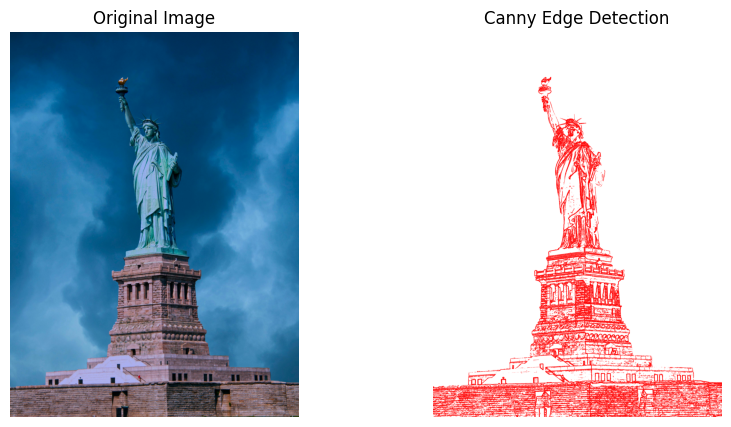

In [12]:
# Display results
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Canny Edge Detection")
plt.imshow(output_img)
plt.axis("off")

plt.show()